<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/ch02_07_Seaborn%EC%8B%A4%EC%8A%B5_fmri%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.07. Seborn 실습 - fmri 데이터


---
* 날짜: 2022-04-19
* 이름: 김민규

## 학습내용

    - pairplot을 이용해 모든 변수의 분포 및 관계를 시각화 한다.
    - relplot을 이용해 두 변수의 관계를 시각화 한다.


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Spectral')
```


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2, style='white', palette='Spectral') # set을 통해 폰트나 색깔, 스타일을 미리 정리 할 수 있습니다.


## **실습**
---



### (1) 데이터 기본 탐색

#### | 데이터 준비

```
fmri = sns.load_dataset('fmri')
fmri.head()
```

In [ ]:
fmri = sns.load_dataset('fmri')
fmri.head(5)
fmri[fmri['subject']=='s13'] # s13의 데이터만 추출

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
15,s13,17,stim,parietal,-0.008265
29,s13,16,stim,parietal,-0.002856
43,s13,15,stim,parietal,-0.010971
57,s13,14,stim,parietal,-0.033713
...,...,...,...,...,...
995,s13,1,cue,frontal,-0.010346
1016,s13,9,cue,frontal,-0.082955
1029,s13,8,cue,frontal,-0.070991
1040,s13,12,cue,frontal,-0.020686


#### | 데이터 기본 탐색

In [ ]:
fmri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


In [ ]:
fmri.describe() # int 타입의 데이터에 대해서만 분석합니다.

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [ ]:
fmri.subject.unique() # subject 열의 카테고리를 확인합니다.

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

In [ ]:
fmri.event.unique() # event 열의 카테고리를 확인합니다.

array(['stim', 'cue'], dtype=object)

In [ ]:
fmri.region.unique() # region 열의 카테고리를 확인합니다.

array(['parietal', 'frontal'], dtype=object)

### (2) Pair plot

```
seaborn.pairplot(data, *, 
                hue=None, 
                hue_order=None, 
                palette=None, 
                vars=None, 
                x_vars=None, y_vars=None
                kind='scatter', # {‘scatter’, ‘kde’, ‘hist’, ‘reg’}
                diag_kind='auto', # {‘auto’, ‘hist’, ‘kde’, None}
                markers=None, 
                height=2.5, aspect=1)¶
```

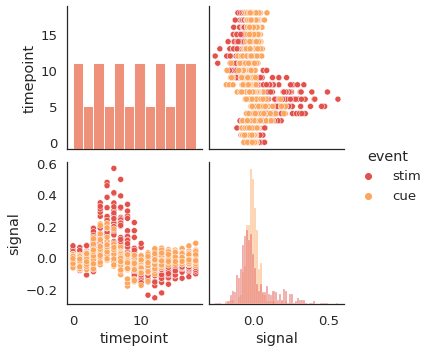

In [ ]:
# pairplot은 모든 columns에 대한 산점도를 그려줍니다.
# 수치 자료형에 대해서만 상관플롯 및 부포를 그려줍니다.
# hue는 색깔을 나눕니다. event 칼럼 데이터에 따라 색깔 나눕니다.
# diag_kind는 대각선의 분포플롯 종류
sns.pairplot(fmri,
             hue='event',
             diag_kind='hist')

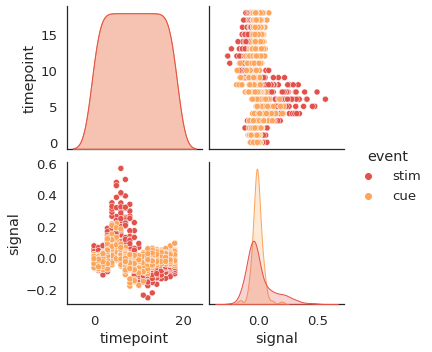

In [ ]:
# pairplot은 모든 columns에 대한 산점도를 그려줍니다.
# 수치 자료형에 대해서만 상관플롯 및 부포를 그려줍니다.
# hue는 색깔을 나눕니다. event 칼럼 데이터에 따라 색깔 나눕니다.
# diag_kind는 대각선의 분포플롯 종류
sns.pairplot(fmri,
             hue='event',
             diag_kind='kde')

### (3) Relational plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.relplot(x=None, y=None, 
                hue=None, 
                size=None, 
                style=None, 
                data=None, 
                row=None, col=None, 
                col_wrap=None,
                row_order=None, col_order=None, 
                palette=None, 
                hue_order=None, hue_norm=None, 
                sizes=None, size_order=None, size_norm=None,
                markers=None, dashes=None, style_order=None,
                legend='auto', # “auto”, “brief”, “full”, or False
                kind='scatter', # 'scatter', 'line'
                height=5, aspect=1, 
                facet_kws=None, 
                units=None)
```

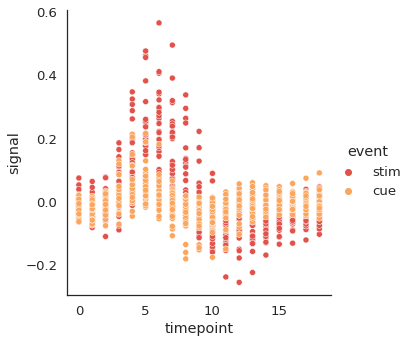

In [ ]:
sns.relplot(data=fmri, x='timepoint',y='signal',
           hue='event',
           kind = 'scatter'
           
           )

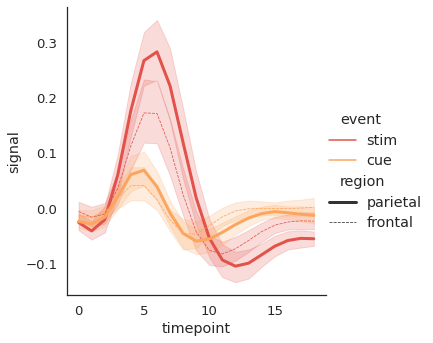

In [ ]:
# size : region(뇌 영역) 별로 선의 굵기를 분류합니다.
# style : region(뇌 영역) 별로 선의 스타일을 분류합니다.
sns.relplot(data=fmri, x='timepoint',y='signal',
           hue='event',
           kind = 'line',
           size = 'region',
            style= 'region'
           )

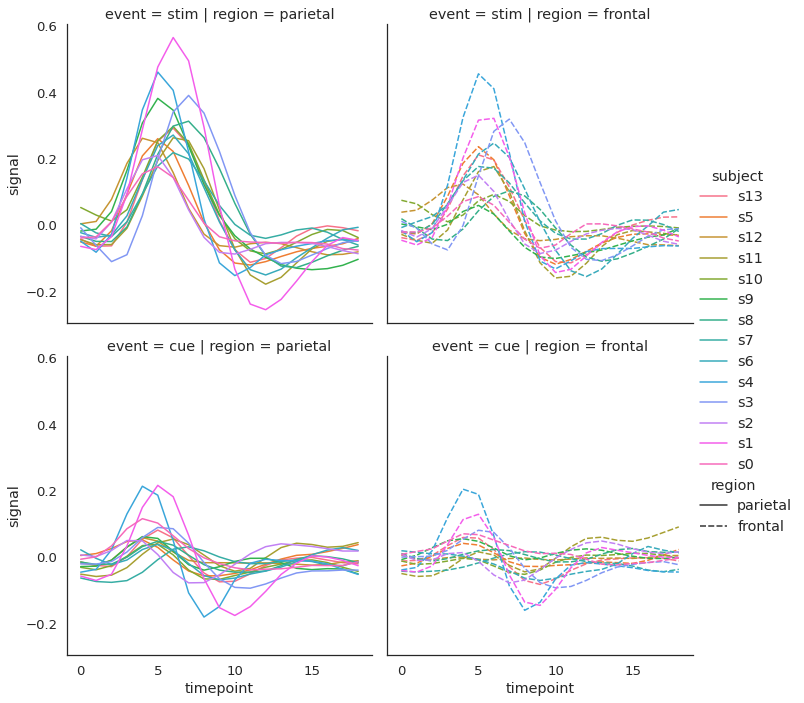

In [ ]:
# 실험자 별로 그래프 그리기
# hue를 통해 선의 개수를 지정합니다.
# col은 영역 별로 플롯을 따로 그립니다.(새로운 열), region 안쪽, 바깥쪽을 기준으로 나누어줍니다.
# row는 event 플롯 별로 나눠서 그립니다.
sns.relplot(data=fmri,
            x='timepoint',
            y='signal',
            kind = 'line',
            hue = 'subject',
            style='region',
            col = 'region',
            row='event'
            )

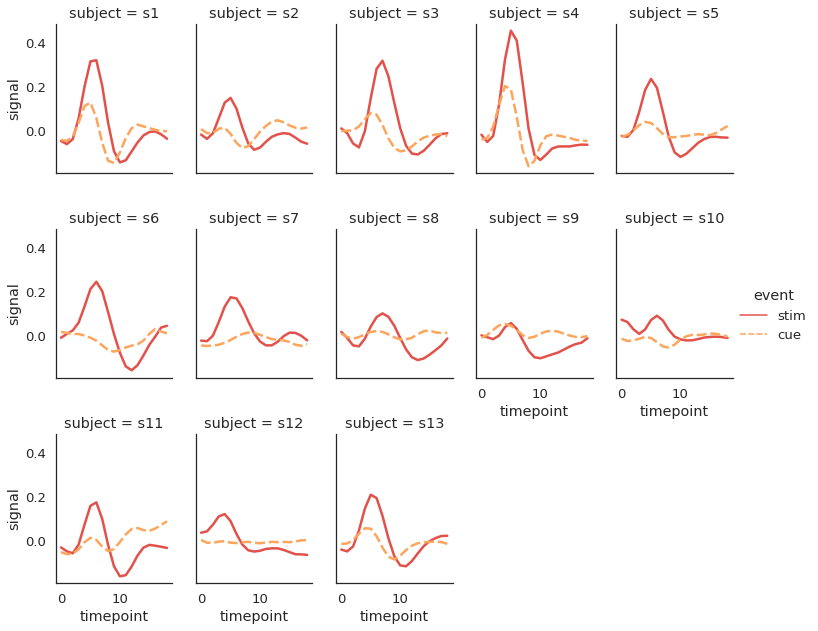

In [ ]:
# region = frotal < parietal
# stim : 자극이 있을 때 없을 때 비교
# 참가자 별 별도의 플롯을 그려보자

# mask = fmri.region == 'parietal'
# fmri[mask]

# -> 마스크를 쓸 수 있는 함수가 있음 (.query)
# col은 참가자 별로 나눠 보여줍니다.
sns.relplot(data=fmri.query("region=='frontal'"),
            x='timepoint',y='signal',
            hue='event',
            kind='line',
            col = 'subject',
            col_order=[f's{i}'for i in range(1,14)],# 열의 순서를 지정
            col_wrap=5,#열 개수를 조정
            aspect=0.7,# 그림 가로 비율을 조정
            height=3,# 그림의 세로 사이즈는 바로 정할 수 있습니다.
            linewidth=2.5,# 선의 굵기
            style='event', # 이벤트별 선 스타일 구분
            
            
            )



## **과제: flights**
---

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0207-03.png?raw=true)


### (1) 데이터 기본 탐색

#### | 데이터 준비

```
sns.load_dataset("flights")
```

In [ ]:
flights=sns.load_dataset("flights")
flights.info()
print(flights.year.unique())
flights.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB
[1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960]


,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### (2) Pair plot

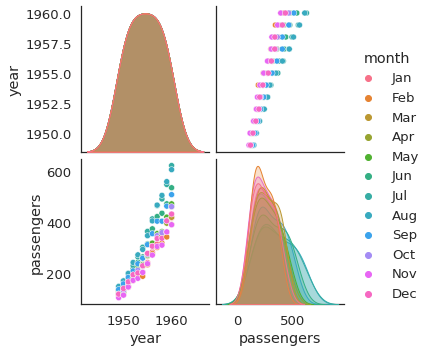

In [ ]:
sns.pairplot(flights,
             hue='month'
            )


### (3) Relational plot

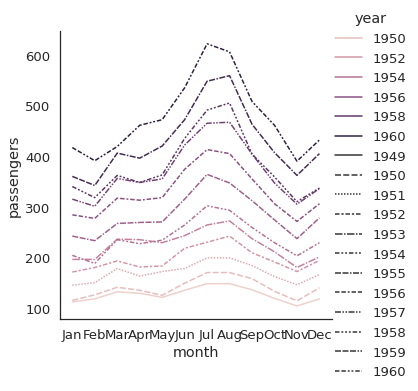

In [ ]:
sns.relplot(data=flights,
            x = 'month',
            y = 'passengers',
            hue='year',
            kind='line',
            style='year',
            
            )


## **과제: [Response of neurons](https://shadlenlab.columbia.edu/resources/RoitmanDataCode.html)**
---

![](https://github.com/yebiny/SkillTreePython-DataAnalysis/blob/main/imgs/ch0207-02.png?raw=true)


### (1) 데이터 기본 탐색

#### | 데이터 준비

```
sns.load_dataset("dots")
```

In [ ]:
dots=sns.load_dataset("dots")

#### | 데이터 기본 탐색


In [ ]:
print(dots.head())
dots.info()
dots.describe()
dots
dots.coherence.unique()
dots['align'].unique()

  align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.2+ KB


array(['dots', 'sacc'], dtype=object)

### (2) Pair plot

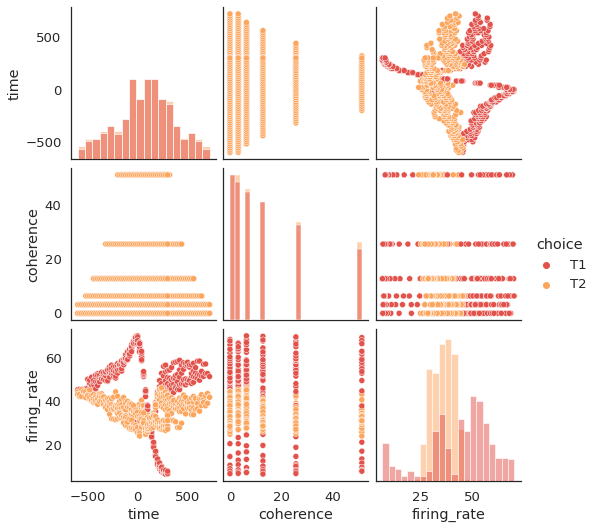

In [ ]:
sns.pairplot(data=dots,
             diag_kind='hist', # 대각선 방향 그래프를 만들어 주기
             hue='choice',
             )

### (3) Relational plot

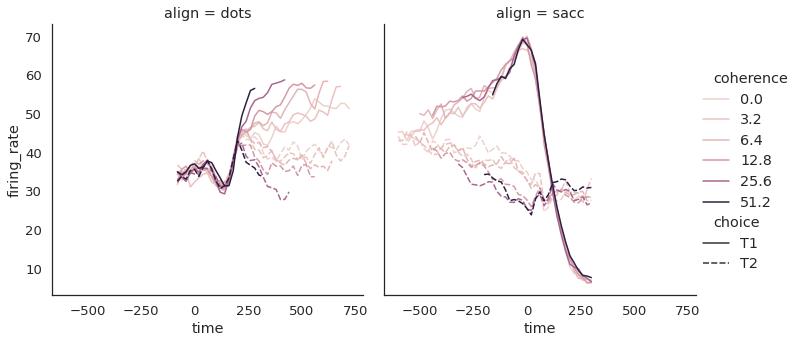

In [ ]:
sns.relplot(data=dots,
            x= 'time',
            y= 'firing_rate',
            
            hue='coherence',
            kind='line',
            style='choice',
            col='align'
            )


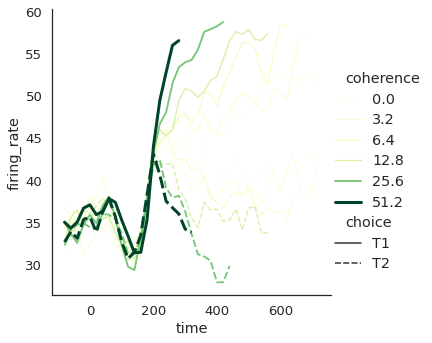

In [ ]:
mask = dots['align']=='dots'
dots[mask]
masked=dots[mask]
sns.relplot(data=masked,
            x='time',
            y='firing_rate',
            kind='line',
            hue='coherence',
            style='choice',
            palette='YlGn',
            size='coherence' # 굵기
            )